# **Dimensionality Reduction by extracting Principle Components**

### **Project Wine:**  wine recognition data
source: [UCI](https://archive.ics.uci.edu/ml/datasets/wine)

In [182]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
sns.set()

In [183]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

--2020-08-17 17:12:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [application/x-httpd-php]
Saving to: ‘wine.data.3’

wine.data.3         100%[===================>]  10.53K  --.-KB/s    in 0s      

2020-08-17 17:12:37 (75.2 MB/s) - ‘wine.data.3’ saved [10782/10782]



In [184]:
!ls


sample_data  wine.data	wine.data.1  wine.data.2  wine.data.3


In [185]:
df = pd.read_csv('wine.data',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [186]:
col  = ['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
        'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
        'OD280/OD315 of diluted wines','Proline']

In [187]:
df.columns = col

In [188]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [189]:
x = df.drop(['class'],axis = 1)
x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [190]:
y = df['class']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class, Length: 178, dtype: int64

In [191]:
y.value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42
                                                 )

In [194]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xtrain = sc.fit_transform(x_train)
xtest = sc.fit_transform(x_test)

In [195]:
from sklearn.decomposition import PCA

In [196]:
pca = PCA(n_components=2)
pca.fit(xtrain)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [197]:
pca.explained_variance_ratio_

array([0.35900066, 0.18691934])

In [198]:
pca.components_

array([[ 0.12753249, -0.25623655, -0.02236181, -0.24428137,  0.14757757,
         0.38490786,  0.41950095, -0.2992598 ,  0.30843734, -0.11907301,
         0.29949964,  0.38381622,  0.27587548],
       [-0.4928047 , -0.1904464 , -0.31676447,  0.03513857, -0.26217161,
        -0.09601687, -0.01513129, -0.07626286, -0.0738558 , -0.53396728,
         0.28133315,  0.14274046, -0.381054  ]])

In [199]:
pd.DataFrame(np.round((pca.components_),3),columns = x.columns).T

,0,1
Alcohol,0.128,-0.493
Malic acid,-0.256,-0.190
Ash,-0.022,-0.317
Alcalinity of ash,-0.244,0.035
Magnesium,0.148,-0.262
Total phenols,0.385,-0.096
Flavanoids,0.420,-0.015
Nonflavanoid phenols,-0.299,-0.076
Proanthocyanins,0.308,-0.074
Color intensity,-0.119,-0.534


This shows the 2 pca components for each feature of data. There is no predefined no.of components.



In [200]:
pca = PCA(n_components=None)
pca.fit(xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [201]:
pca.transform(x)

array([[ 314.18963966, -449.34323792, -133.83098472, ...,  524.07904714,
        -106.24268019,   41.86172515],
       [ 306.46326054, -435.42083616, -136.26420608, ...,  513.80621096,
        -106.61231203,   39.22057027],
       [ 342.35074777, -487.99423471, -150.54522266, ...,  582.43759177,
        -120.96221724,   44.38902001],
       ...,
       [ 244.47491151, -362.36184242, -100.20358704, ...,  416.24112487,
         -79.78105132,   34.32893349],
       [ 246.42820687, -363.46023345, -100.90290814, ...,  418.32989482,
         -81.04282813,   34.38175963],
       [ 164.42102892, -251.17316529,  -59.42820025, ...,  284.96422091,
         -52.67860639,   25.10478557]])

In [202]:
pca.components_

array([[ 0.12753249, -0.25623655, -0.02236181, -0.24428137,  0.14757757,
         0.38490786,  0.41950095, -0.2992598 ,  0.30843734, -0.11907301,
         0.29949964,  0.38381622,  0.27587548],
       [-0.4928047 , -0.1904464 , -0.31676447,  0.03513857, -0.26217161,
        -0.09601687, -0.01513129, -0.07626286, -0.0738558 , -0.53396728,
         0.28133315,  0.14274046, -0.381054  ],
       [-0.18514872,  0.1424076 ,  0.60965837,  0.59527663,  0.0663528 ,
         0.17680473,  0.18174944,  0.20274722,  0.15058799, -0.12401015,
         0.07300682,  0.21392593, -0.1430069 ],
       [ 0.07944523,  0.42367499, -0.20690471, -0.05357487, -0.65044937,
         0.24598834,  0.17997707,  0.04552367,  0.33127069,  0.1171025 ,
        -0.2808828 ,  0.15401634, -0.15614063],
       [-0.30961279,  0.21129631, -0.19918583,  0.09357804,  0.51387197,
        -0.01130865, -0.03174679, -0.45930325,  0.37662645,  0.05827632,
        -0.36517145, -0.0507927 , -0.23179436],
       [-0.18584154, -0.656257

In [203]:
np.round(pca.explained_variance_ratio_,3)

array([0.359, 0.187, 0.116, 0.074, 0.067, 0.049, 0.042, 0.027, 0.023,
       0.019, 0.017, 0.013, 0.008])

Text(0, 0.5, 'cumulative explained variance')

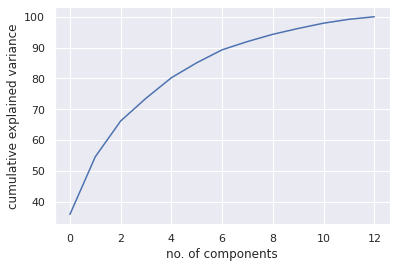

In [204]:
plt.plot(np.cumsum(pca.explained_variance_ratio_,)*100)
plt.xlabel('no. of components')
plt.ylabel('cumulative explained variance')

In [205]:
res = pca.transform(xtrain)
index = ['PCA_'+str(k) for k in range(0,len(res))]

In [206]:
df1 = pd.DataFrame(res,columns=df.columns[1:],index=index)[0:4]
df1.T.sort_values(by = 'PCA_0')

,PCA_0,PCA_1,PCA_2,PCA_3
Malic acid,-3.615327,-0.482177,1.275033,-2.496962
Alcohol,-1.166027,-3.862612,2.283538,-1.678507
Proline,-0.755592,-0.122403,0.415850,-0.791136
Proanthocyanins,-0.639966,-0.005981,-0.481336,-0.121445
Flavanoids,-0.553745,1.257686,-0.979052,-0.666927
Hue,-0.112150,0.504570,0.480180,-0.319599
OD280/OD315 of diluted wines,0.071476,-0.182884,-0.458933,0.045823
Magnesium,0.221634,-0.226540,0.215798,-0.003420
Color intensity,0.262397,-0.453600,-0.777822,-0.123055
Nonflavanoid phenols,0.918085,-0.113136,-0.678263,0.150849


# **Kernel PCA:** 
Non-linear Dimensionality reduction through the use of kernels.

In [207]:
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA,KernelPCA

In [208]:
np.random.seed(0)
x,y = make_circles(n_samples=400,noise=0.05,factor=0.3)

In [209]:
# kernel pca
kpca = KernelPCA(kernel='rbf',fit_inverse_transform=True,gamma=10)
x_kpca = kpca.fit_transform(x)
x_back = kpca.inverse_transform(x_kpca)

In [210]:
# linear pca
pca = PCA()
x_pca = pca.fit_transform(x)

Text(0, 0.5, '2nd PCA component')

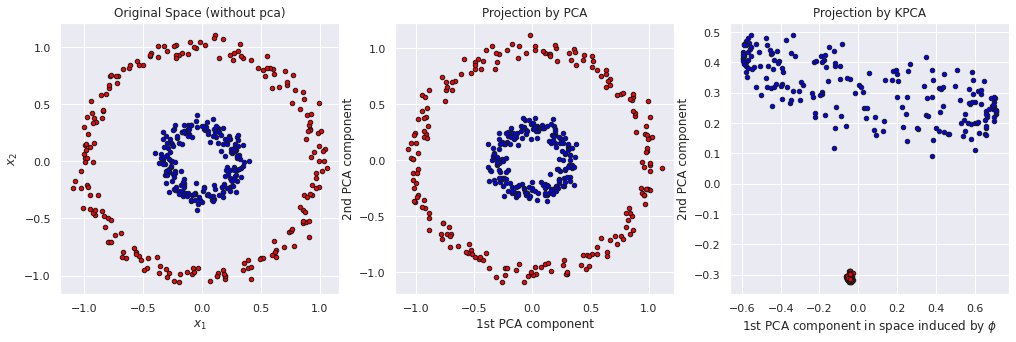

In [211]:
plt.figure(figsize=(17,5))
reds = y==0
blues = y==1

plt.subplot(1,3,1)
plt.title('Original Space (without pca)')
plt.scatter(x[reds,0],x[reds,1],c="red",s = 20,edgecolors = 'k')
plt.scatter(x[blues,0],x[blues,1],c="blue",s = 20,edgecolors = 'k')
plt.xlabel("$x_{1}$")
plt.ylabel("$x_{2}$")

plt.subplot(1,3,2)
plt.title('Projection by PCA')
plt.scatter(x_pca[reds,0],x_pca[reds,1],c="red",s = 20,edgecolors = 'k')
plt.scatter(x_pca[blues,0],x_pca[blues,1],c="blue",s = 20,edgecolors = 'k')
plt.xlabel("1st PCA component")
plt.ylabel("2nd PCA component")

plt.subplot(1,3,3)
plt.title('Projection by KPCA')
plt.scatter(x_kpca[reds,0],x_kpca[reds,1],c="red",s = 20,edgecolors = 'k')
plt.scatter(x_kpca[blues,0],x_kpca[blues,1],c="blue",s = 20,edgecolors = 'k')
plt.xlabel("1st PCA component in space induced by $\phi$")
plt.ylabel("2nd PCA component")

There is no much difference b/w original data and linear pca projection but huge difference b/w original data and kernel pca plot as kpca projects the data in that space where it can easily classified.

##**KPCA Example:**

using iris dataset

In [212]:
df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']

In [213]:
df.keys()


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [214]:

col = ['petal_length', 'petal_width']
x = df.loc[:,col]
x

,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [215]:
y = df['species'].map({'versicolor':0,'virginica':1})
y.value_counts()

1    50
0    50
Name: species, dtype: int64

In [216]:
kpca = KernelPCA(kernel='rbf',n_components=2)
x_kpca = kpca.fit_transform(x)

In [217]:
from sklearn.linear_model import LogisticRegression


In [218]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'without PCA projection')

<Figure size 576x576 with 0 Axes>

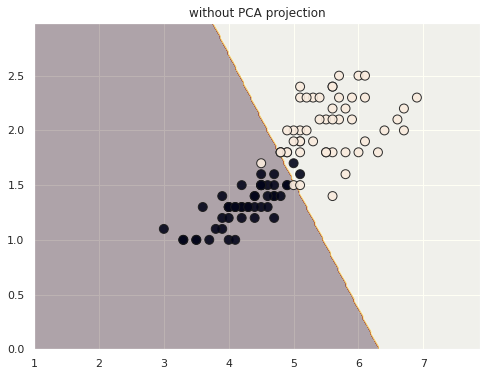

In [219]:

plt.figure(figsize = (8,8))
xv = x.values.reshape(-1,1)
h = 0.02
xmin,xmax = xv.min(),xv.max() + 1
ymin, ymax = y.min(), y.max() + 2
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (8,6))
ax = plt.contourf(xx,yy,z,cmap = 'afmhot',alpha = 0.3)
plt.scatter(x.values[:,0],x.values[:,1],c=y,s = 80, alpha = 0.9,edgecolors='k')
plt.title('without PCA projection')



In [220]:
model.fit(x_kpca,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'with PCA projection')

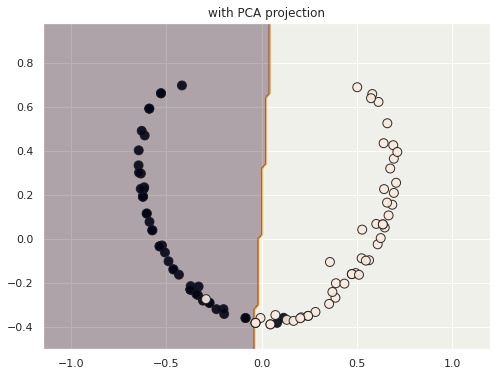

In [221]:
xv = x_kpca
h = 0.02
xmin,xmax = xv.min() - 0.5,xv.max() + 0.5
ymin, ymax = y.min()-0.5, y.max()
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (8,6))
ax = plt.contourf(xx,yy,z,cmap = 'afmhot',alpha = 0.3)
plt.scatter(x_kpca[:,0],x_kpca[:,1],c=y,s = 80, alpha = 0.9,edgecolors='k')
plt.title('with PCA projection')


# **LDA:** 
suprvised dimensionality reduction technique.

project data into linear subspace consisting of the direction which maximize the saperation b/w classes. 

mostly used in multiclass.

In [222]:
x

,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [223]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [224]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [225]:
lda = LinearDiscriminantAnalysis()
lda.fit(x,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Text(0.5, 1.0, 'LDA projection')

<Figure size 576x576 with 0 Axes>

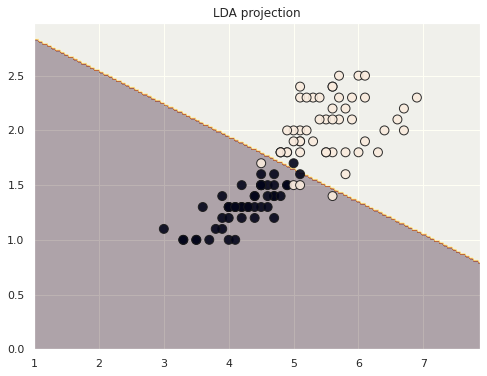

In [226]:
plt.figure(figsize = (8,8))
xv = x.values.reshape(-1,1)
h = 0.02
xmin,xmax = xv.min(),xv.max() + 1
ymin, ymax = y.min(), y.max() + 2
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

z = lda.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (8,6))
ax = plt.contourf(xx,yy,z,cmap = 'afmhot',alpha = 0.3)
plt.scatter(x.values[:,0],x.values[:,1],c=y,s = 80, alpha = 0.9,edgecolors='k')
plt.title('LDA projection')

# **PCA Vs LDA:** 

1. PCA identifies the combination of attributes  that account for the **most variance in the data** but LDA tries to identify attributes that account for the **most variance between the classes**. 

2. PCA is **unsupervised** approach ,not uses any known class labels but LDA is **supervised** method , using known class labels. 

In [227]:
data = sklearn.datasets.load_iris()

In [228]:
x = data.data
y = data.target
target = data.target_names

In [229]:
pca = PCA(n_components=2)
x_pca = pca.fit(x).transform(x)

In [230]:
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit(x,y).transform(x)

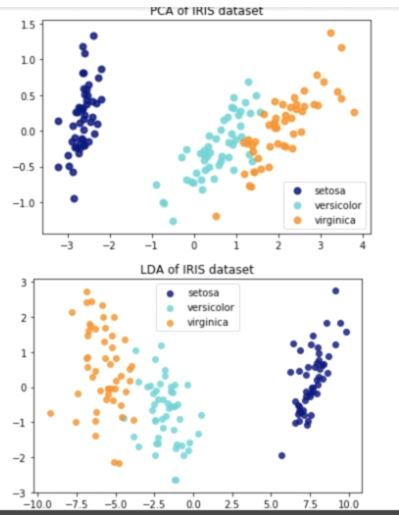